In [2]:
import re
import os

from sklearn.preprocessing import StandardScaler        #   type: ignore
import numpy as np                                      #   type: ignore
import pandas as pd                                     #   type: ignore
import matplotlib.pyplot as plt                         #   type: ignore
import seaborn as sns                                   #   type: ignore

### Setup

In [3]:
lothar = '/home/enno/uni/SS24/thesis/1_RegEx/1_TMP'

In [4]:
R = 5
E = '1E-1'
M = 0

In [5]:
if os.getcwd() == lothar:
    df = pd.read_csv('/home/enno/uni/SS24/thesis/1_RegEx/0_data/regEx_5R.csv')
    
    clans_file = f'/home/enno/uni/SS24/thesis/1_RegEx/1_TMP/clans_out/{R}R_{M}MM_seq_{E}.clans'
    clstr_file = f'/home/enno/uni/SS24/thesis/1_RegEx/1_TMP/cd_out/{R}R_{M}MM_seq.clstr'
    
    full_fasta_file = f'/home/enno/uni/SS24/thesis/1_RegEx/0_data/fasta/{R}R_{M}MM_seq.fasta'
    cd_out_fasta_file = f'/home/enno/uni/SS24/thesis/1_RegEx/1_TMP/cd_out/{R}R_{M}MM_seq.fasta'
else:
    df = pd.read_csv('/ebio/abt1_share/prediction_hendecads/1_repo/1_RegEx/0_data/regEx.csv')

    clans_file = f'/ebio/abt1_share/prediction_hendecads/1_repo/1_RegEx/1_TMP/clans_out/{R}R_{M}MM_seq_{E}.clans'
    clstr_file = f'/ebio/abt1_share/prediction_hendecads/1_repo/1_RegEx/1_TMP/cd_out/{R}R_{M}MM_seq.clstr'

    full_fasta_file = f'/ebio/abt1_share/prediction_hendecads/1_repo/1_RegEx/0_data/fasta/{R}R_{M}MM_seq.fasta'
    cd_out_fasta_file = f'/ebio/abt1_share/prediction_hendecads/1_repo/1_RegEx/1_TMP/cd_out/{R}R_{M}MM_seq.fasta'

In [5]:
full_tmp_df = df.loc[df['c'] == 0].reset_index(drop=True)

In [6]:
print(len(df))
df.head()

36455


,id,seq,stretch_ix,stretch_seq,c,npf_x,npf_y,1R_0MM_seq,1R_0MM_ix,1R_0MM_n,...,1R_2MM_n,3R_2MM_seq,3R_2MM_ix,3R_2MM_n,5R_2MM_seq,5R_2MM_ix,5R_2MM_n,10R_2MM_seq,10R_2MM_ix,10R_2MM_n
0,MCD6041253.1,mrlvyvavaailcsfsttslagaektakragkfvektatragkfve...,"[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...",['rlvyvavaailcsfsttslagaektakragkfvektatragkfv...,-1.0,-567.38850,34.030270,"[['lvyvavaailc', 'vyvavaailcs', 'lagaektakra',...","[[[1, 12], [2, 13], [18, 29], [25, 36], [36, 4...",7,...,37,"[['aailcsfsttslagaektakragkfvektatra', 'sttsla...","[[[7, 40], [14, 47], [18, 51], [25, 58], [36, ...",5,[['sttslagaektakragkfvektatragkfvertatkagkfver...,"[[[14, 69]]]",1,[[]],[[]],0
1,MCD7737945.1,mqgrvffreaaalilaaalsmaglpasaaansgieaaalrteeete...,"[[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, ...",['eeetepstkeavqetavetdtgekpesgedgqeesaesteeeqe...,-1.0,313.18863,-218.576080,[[]],[[]],0,...,58,[[]],[[]],0,[[]],[[]],0,[[]],[[]],0
2,MYF28459.1,merlqtdllkeihalrgemhaefasvrqemhagfasirqemhaeta...,"[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...",['erlqtdllkeihalrgemhaefasvrqemhagfasirqemhaet...,-1.0,535.79120,-22.468689,"[['ihalrgemhae', 'isgvrervarv', 'varvethlqrt']]","[[[10, 21], [50, 61], [57, 68]]]",3,...,47,"[['ihalrgemhaefasvrqemhagfasirqemhae', 'mhagfa...","[[[10, 43], [28, 61]]]",2,[[]],[[]],0,[[]],[[]],0
3,WP_168920948.1,msdvfltasyadrekvktlgarwnpaekrwyvpsgrdlspfaawlp...,"[[437, 438, 439, 440, 441, 442, 443, 444, 445,...",['aqslvveikhaasqqlllarhvvparmaevtaegrqalrtakaq...,41.0,-346.27220,104.598206,"[['aqslvveikha', 'vveikhaasqq', 'lllarhvvpar',...","[[[0, 11], [4, 15], [15, 26], [24, 35], [48, 5...",6,...,82,"[['aqslvveikhaasqqlllarhvvparmaevtae', 'lvveik...","[[[0, 33], [3, 36], [4, 37], [15, 48], [26, 59...",6,[['vveikhaasqqlllarhvvparmaevtaegrqalrtakaqsqa...,"[[[4, 59]]]",1,[[]],[[]],0
4,WP_026306873.1,mllrriarpllsaafiaegidilqnpgpladrlspaldftrrrsqh...,"[[172, 173, 174, 175, 176, 177, 178, 179, 180,...",['slgwrgrraardakdhaealaataaaiaatarergtnlvdtare...,37.0,164.44267,341.078280,"[['ardakdhaeal', 'aealaataaai', 'alaataaaiaa',...","[[[9, 20], [16, 27], [18, 29], [20, 31], [21, ...",15,...,114,"[['lgwrgrraardakdhaealaataaaiaatarer', 'grraar...","[[[1, 34], [5, 38], [9, 42], [12, 45], [16, 49...",15,[[]],[[]],0,[[]],[[]],0


In [7]:
tmp_df = df[(df[f'{R}R_{M}MM_n'] > 0) & (df['c'] == 0)].reset_index(drop=True)
len(tmp_df)

1540

#### .clstr and .clans Parser

In [8]:
def parse_numbers(filename):
    # Extracts the cluster assignment for 5R hits from the .clans file

    clusters = []
    with open(filename, 'r') as file:
       
        for line in file:
            
            if re.match('numbers=', line):
                
                _, num_str = line.split('=')
                numbers = [int(num.strip()) for num in num_str.split(';')[:-1]]

                clusters.append(numbers)
    
    return clusters

In [9]:
clans_numbers = parse_numbers(clans_file)

In [10]:
def parse_cluster_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    clusters = {}
    current_representative = None

    for line in lines:
        if line.startswith('>Cluster'):
            # This line is the start of a new cluster, so the next line will contain the representative sequence
            current_representative = None
        else:
            # This line contains a sequence
            sequence = line.split(', ')[1].split('...')[0].strip()
            if current_representative is None:
                # This is the first sequence in the cluster, so it's the representative sequence
                current_representative = sequence
            clusters[sequence[1:]] = current_representative[1:]

    return clusters

In [11]:
rep_dict = parse_cluster_file(clstr_file)

### Representatives

#### Create DataFrame for Representatives

In [12]:
# NOTE create method?

cd_out_hit_df = pd.DataFrame(columns=['id', 'stretch_x', 'seq_x', 'rep_id'])
ix = 0

with open(cd_out_fasta_file, 'r') as file:

    lines = [line.strip() for line in file.readlines()]
    headers = lines[::2]
    seqs = lines[1::2]
    
    for hx, header_str in enumerate(headers):
        print(f'Progress {hx+1}/{len(headers)}', end='\r')
        
        header = header_str.split('_')
        id, strx, sx = '_'.join(header[:-7])[1:], header[-3], header[-1]
        
        cd_out_hit_df.loc[ix] = [id, strx, sx, header_str[1:]]
        ix += 1

In [13]:
# Assign the cluster number to each sequence
for c, numbers in enumerate(clans_numbers):
    
    cd_out_hit_df.loc[numbers, 'c'] = c

cd_out_hit_df.loc[cd_out_hit_df['c'].isna(), ['c']] = -1  # unassigned = -1
cd_out_hit_df['c'] = cd_out_hit_df['c'].astype(str)

In [14]:
print(len(cd_out_hit_df))
cd_out_hit_df.head()

4585


,id,stretch_x,seq_x,rep_id,c
0,MBQ9252633.1,0,0,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_0,0.0
1,MBQ9252633.1,0,4,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_4,0.0
2,WP_165218174.1,0,0,WP_165218174.1_5R_0MM_seq_stretch_0_seq_0,-1.0
3,WP_075688569.1,0,0,WP_075688569.1_5R_0MM_seq_stretch_0_seq_0,2.0
4,WP_075688569.1,1,0,WP_075688569.1_5R_0MM_seq_stretch_1_seq_0,-1.0


#### Get Representative Coordinates

In [15]:
# Add x and y coordinates from CLANS to the dataframe
with open(clans_file, 'r') as file:
    data = file.readlines()

data = [line.strip() for line in data]

first_pos = 1
for line in data:
    if line == '<pos>':
        break
    else:
        first_pos += 1

last_pos = first_pos + len(cd_out_hit_df)

pos = [x.split() for x in data[first_pos:last_pos]]

cd_out_hit_df['x'] = [float(x[1]) for x in pos]
cd_out_hit_df['y'] = [float(x[2]) for x in pos]

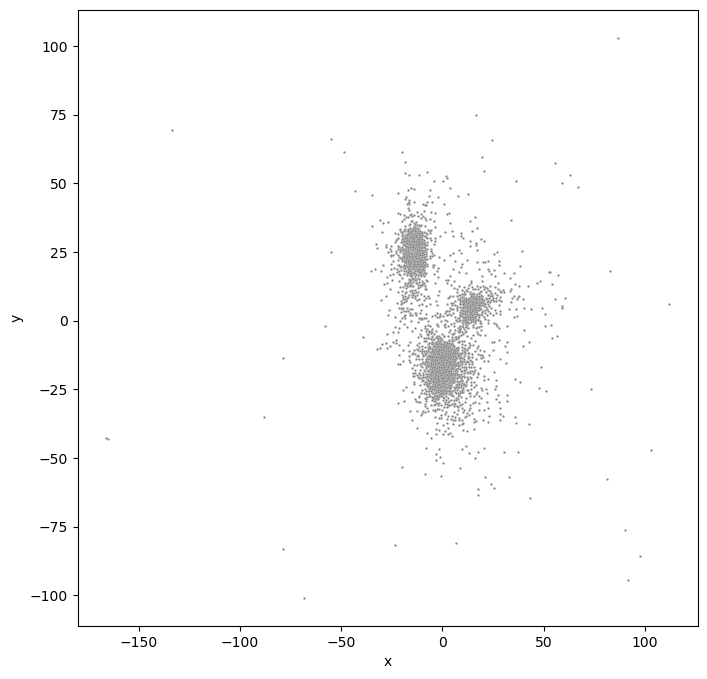

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=cd_out_hit_df, x='x', y='y', color='grey', s=3)
plt.show()

### All Hits

#### Create DataFrame for all RegEx Hits

In [17]:
full_hit_df = pd.DataFrame(columns=['id', 'stretch_x', 'seq_x', 'header'])
ix = 0

with open(full_fasta_file, 'r') as file:

    lines = [line.strip() for line in file.readlines()]
    headers = lines[::2]
    seqs = lines[1::2]
    
    for hx, header_str in enumerate(headers):
        
        print(f'Progress: {hx+1}/{len(headers)}', end='\r')

        header = header_str.split('_')
        id, strx, sx = '_'.join(header[:-7])[1:], header[-3], header[-1]
        full_hit_df.loc[ix] = [id, strx, sx, header_str[1:]]
        ix += 1

In [18]:
# Assign each hit its representative hit
full_hit_df['rep_id'] = full_hit_df['header'].apply(lambda x: rep_dict[x])

In [19]:
print(len(full_hit_df))
full_hit_df.head()

11235


,id,stretch_x,seq_x,header,rep_id
0,MBQ9252633.1,0,0,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_0,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_0
1,MBQ9252633.1,0,1,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_1,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_0
2,MBQ9252633.1,0,2,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_2,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_0
3,MBQ9252633.1,0,3,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_3,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_0
4,MBQ9252633.1,0,4,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_4,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_4


#### Merge Reprenstative and Full Hit DataFrame

In [20]:
merged_df = full_hit_df.merge(cd_out_hit_df[['rep_id', 'c']], on='rep_id', how='right')

print(len(merged_df))
merged_df.head(5)

11235


,id,stretch_x,seq_x,header,rep_id,c
0,MBQ9252633.1,0,0,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_0,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_0,0.0
1,MBQ9252633.1,0,1,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_1,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_0,0.0
2,MBQ9252633.1,0,2,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_2,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_0,0.0
3,MBQ9252633.1,0,3,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_3,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_0,0.0
4,MBQ9252633.1,0,4,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_4,MBQ9252633.1_5R_0MM_seq_stretch_0_seq_4,0.0


### TMP Sequences

#### Derive Community Distribution for Original Sequences

In [21]:
cluster_cols = [f'C{ix}' for ix in range(len(clans_numbers))] + ['C-1']
tmp_df[cluster_cols] = 0

In [22]:
for ix in range(len(tmp_df)): 
    print(f'Progress: {ix+1}/{len(tmp_df)}', end='\r')

    current_seq = tmp_df.iloc[ix]
    current_id = current_seq['id']

    tmp_merged_df = merged_df[merged_df['id'] == current_id]

    for cluster in tmp_merged_df['c']:
        tmp_df.loc[ix, f'C{int(float(cluster))}'] += 1

In [23]:
np.all(tmp_df[cluster_cols].sum(axis=1) == tmp_df[f'{R}R_{M}MM_n'])

True

In [24]:
# heights = [0 for _ in range(len(clans_numbers) + 1)]
# # heights_w_unassigned = [0 for _ in range(len(clans_numbers) + 1)]

# for i in range(len(tmp_df)):
#     current_seq = tmp_df.iloc[i]

#     c = -1
#     c_unassigned = 0

#     for cx in [f'C{ix}' for ix in range(len(clans_numbers))]:
#         if current_seq[cx] > 0:
#             c += 1
#             c_unassigned += 1
    
#     if current_seq['C-1'] > 0:
#         c_unassigned += 1

#     heights[c] += 1
#     # heights_w_unassigned[c_unassigned] += 1

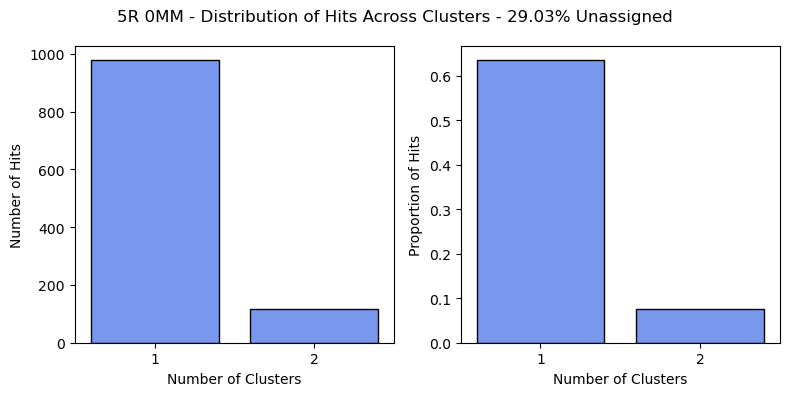

In [25]:
tmp_df['present_in_n_cluster'] = tmp_df[cluster_cols[:-1]].apply(lambda row: (row != 0).sum(), axis=1)

x = tmp_df['present_in_n_cluster'].value_counts().sort_index().index
y = tmp_df['present_in_n_cluster'].value_counts().sort_index().values

only_unassigned_seq = (0 in x)

if only_unassigned_seq:

    percent_unassigned = y[0] / y.sum() * 100

    x_ = x[1:]
    y_ = y[1:]

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.barplot(x=x_, y=y_, edgecolor='black', color='#648FFF', ax=axes[0])
sns.barplot(x=x_, y=np.array(y_) / sum(y), edgecolor='black', color='#648FFF', ax=axes[1])

fig.suptitle(f'{R}R {M}MM - Distribution of Hits Across Clusters - {percent_unassigned:.2f}% Unassigned')

axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Number of Hits')

axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Proportion of Hits')

plt.tight_layout()
plt.show()

In [26]:
# sns.barplot(x=list(range(1, len(clans_numbers) + 2)), y=heights_w_unassigned, edgecolor='black', color='#DC267F', label='With Unassigned')   
# sns.barplot(x=list(range(1, len(clans_numbers) + 2)), y=heights, edgecolor='black', color='#648FFF')   

# plt.title(f'{R}R {M}MM - Distribution of Hits Across Clusters')
    
# plt.xlabel('Number of Clusters')
# plt.ylabel('Number of Hits')


# if os.getcwd() == lothar:
#     plt.savefig(f'/home/enno/uni/SS24/thesis/1_RegEx/1_TMP/plots/{R}R_{M}MM_{E}.png')
# else:
#     plt.savefig(f'/ebio/abt1_share/prediction_hendecads/1_repo/1_RegEx/1_TMP/plots/{R}R_{M}MM_{E}.png')
# plt.show()

In [27]:
# normalized_heights = np.array(heights) / sum(heights)
# # normalized_heights_w_unassigned = np.array(heights_w_unassigned) / sum(heights_w_unassigned)

# # sns.barplot(x=list(range(1, len(clans_numbers) + 2)), y=normalized_heights_w_unassigned, edgecolor='black', color='#DC267F', label='With Unassigned')   
# sns.barplot(x=list(range(1, len(clans_numbers) + 2)), y=normalized_heights, edgecolor='black', color='#648FFF')   


# plt.title(f'{R}R {M}MM - Distribution of Hits from Sequences across Clusters')
    
# plt.xlabel('Number of Clusters')
# plt.ylabel('Fraction of Hits')

# if os.getcwd() == lothar:
#     plt.savefig(f'/home/enno/uni/SS24/thesis/1_RegEx/1_TMP/plots/{R}R_{M}MM_{E}_norm.png')
# else:
#     plt.savefig(f'/ebio/abt1_share/prediction_hendecads/1_repo/1_RegEx/1_TMP/plots/{R}R_{M}MM_{E}_norm.png')
# plt.show()

#### Change of Detected Hit Counts

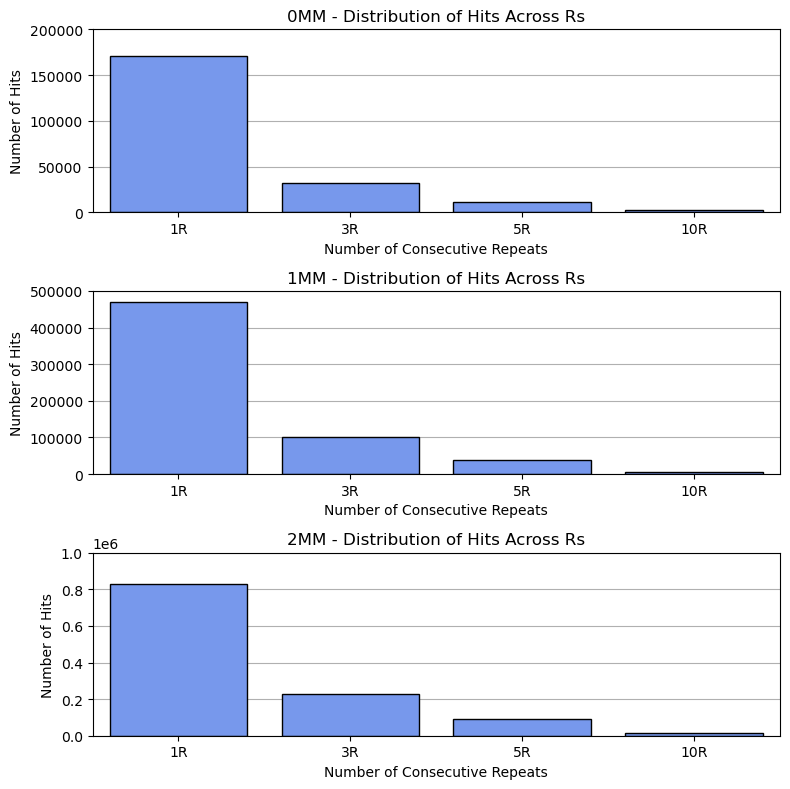

In [28]:
Rs = [1, 3, 5, 10]
Ms = [0, 1, 2]
ylims = [0.2*1e6, 0.5*1e6, 1e6]
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

for mx, m in enumerate(Ms):
    
    heights = []
    for r in Rs:

        heights.append(full_tmp_df[f'{r}R_{m}MM_n'].sum())

    sns.barplot(x=[f'{r}R' for r in Rs], y=heights, edgecolor='black', color='#648FFF', ax=axs[mx])
    axs[mx].set_title(f'{m}MM - Distribution of Hits Across Rs')
    axs[mx].set_xlabel('Number of Consecutive Repeats')
    axs[mx].set_ylabel('Number of Hits')
    axs[mx].set_ylim(0, ylims[mx])
    axs[mx].grid(axis='y')
    axs[mx].set_axisbelow(True)



plt.tight_layout()  
plt.show()

#### Length Histograms

In [6]:
tmp_df = df.loc[df['c'] == 0, :].reset_index(drop=True)

In [7]:
cols = [f'5R_{m}MM_n' for m in range(5)] 

for col in cols:
    tmp_df[col[:-1] + 'hue'] = tmp_df[col].apply(lambda x: 'No match' if x == 0 else 'Match')

tmp_df['seq_len'] = tmp_df['seq'].apply(len)

In [8]:
tmp_df['5R_0MM_hue'].value_counts()

5R_0MM_hue
No match    3395
Match       1540
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


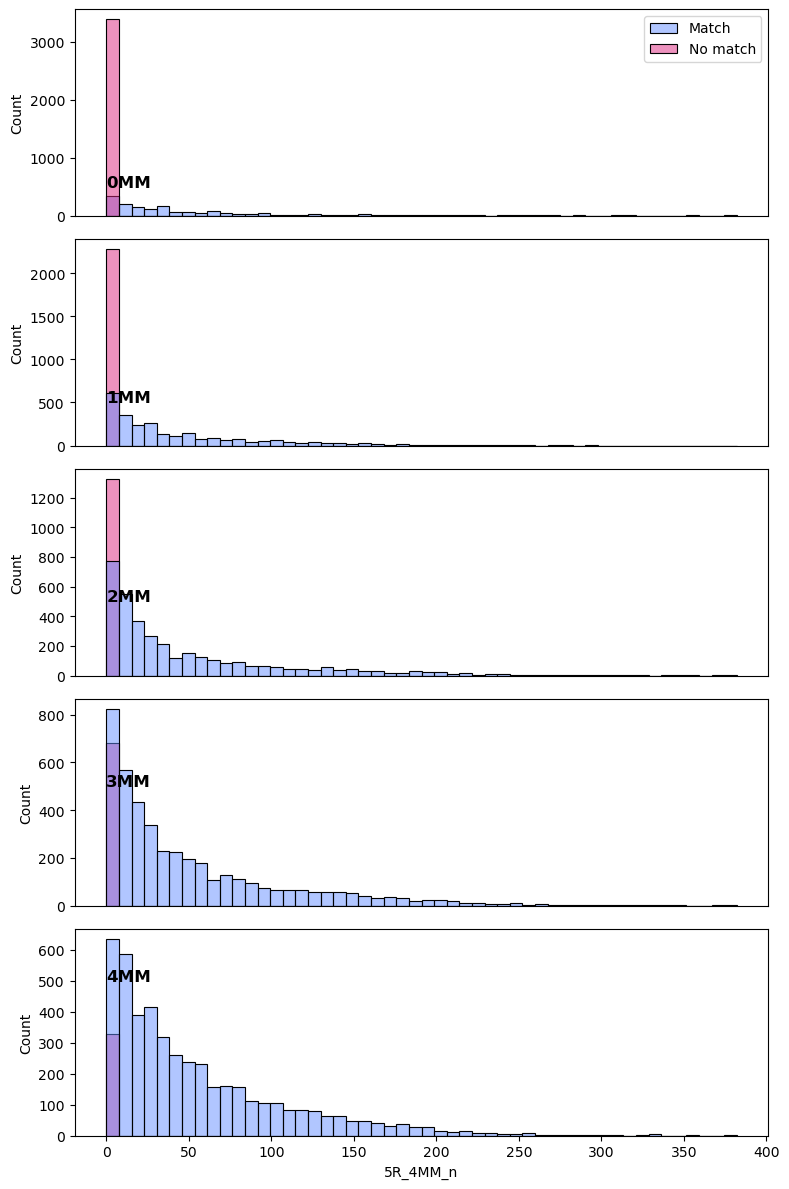

In [56]:
fig, axes = plt.subplots(5, 1, figsize=(8, 12))

cols = [f'5R_{m}MM_hue' for m in range(5)] 
first = True

for cx, col in enumerate(cols):
    if cx == 0:
        sns.histplot(data=tmp_df, x='seq_len', hue=col, bins=50, palette=['#DC267F', '#648FFF'], edgecolor='black', ax=axes[cx])
        axes[cx].legend(title='', labels=['Match', 'No match'])    
        first = False
    else:
        sns.histplot(data=tmp_df, x='seq_len', hue=col, bins=50, palette=['#648FFF', '#DC267F'], edgecolor='black', ax=axes[cx])
        axes[cx].legend().remove()

    if cx != 4:
        axes[cx].set_xticks([])
        axes[cx].set_xlabel('')

    axes[cx].set_ylim(0, 575)
    axes[cx].text(0, 500, f'{cx}MM', fontsize=12, fontweight='bold')

    
plt.tight_layout()
plt.show()

#### N Matches Hist

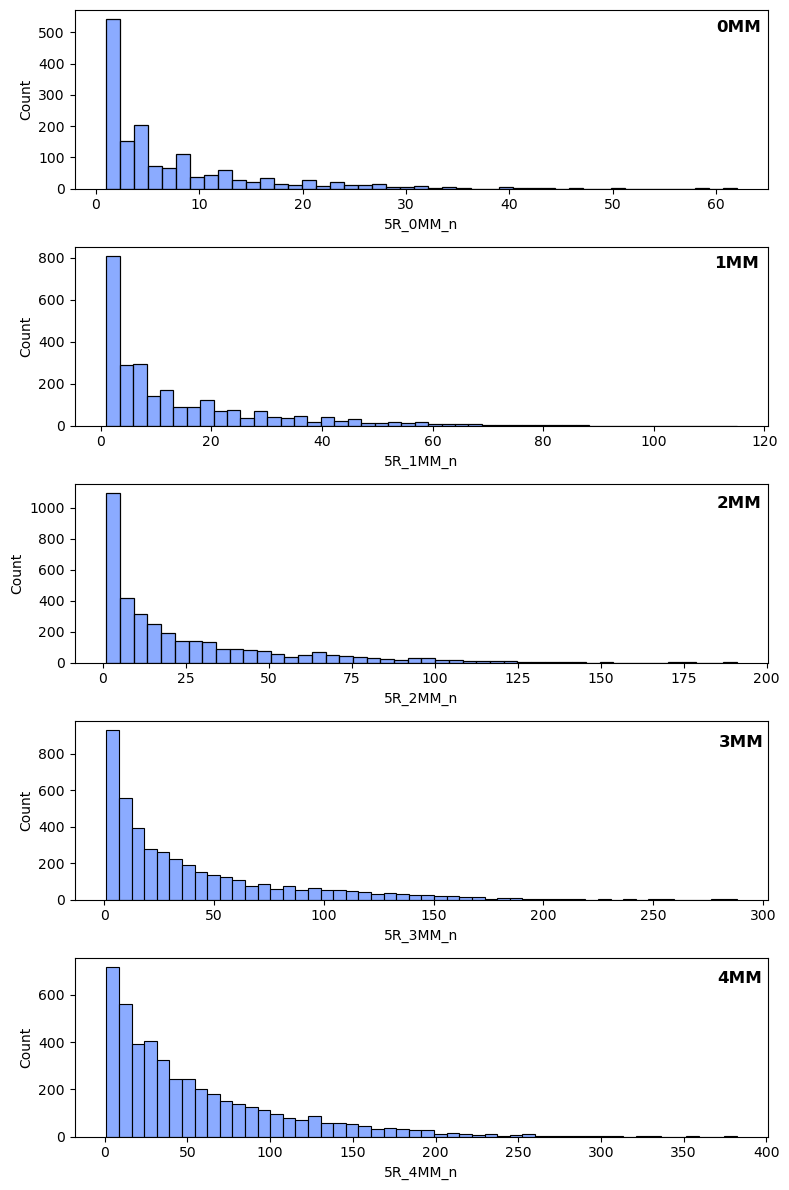

In [82]:
fig, axes = plt.subplots(5, 1, figsize=(8, 12))

cols = [f'5R_{m}MM_hue' for m in range(5)] 
text_pos = [(60, 500), (111, 750), (185, 1000), (280, 840), (370, 650)]
first = True

for cx, col in enumerate(cols):
    sns.histplot(data=tmp_df[tmp_df[col[:-3]+'n'] > 0], x=col[:-3]+'n', bins='auto', color='#648FFF', edgecolor='black', ax=axes[cx])
   
    axes[cx].text(x=text_pos[cx][0], y=text_pos[cx][1], s=f'{cx}MM', fontsize=12, fontweight='bold')
    
plt.tight_layout()
plt.show()

### CLANS

In [29]:
if os.getcwd() == lothar:
    tmp_only_clans_file = '/home/enno/uni/SS24/thesis/1_RegEx/1_TMP/TMP_1E-40.clans'
else:
    tmp_only_clans_file = '/ebio/abt1_share/prediction_hendecads/1_repo/1_RegEx/1_TMP/TMP_1E-40.clans'

#### Get TMP only Coordinates

In [30]:
# Read the fasta IDs from the TMP 14E-40.clans file
with open(tmp_only_clans_file, 'r') as file:
    content = file.read()
    fasta_ids = re.findall(r'>\S+', content)

fasta_ids = [x[1:] for x in fasta_ids]
len(fasta_ids)

4936

In [31]:
with open(tmp_only_clans_file, 'r') as file:
    content = file.readlines()
    content = [x.strip() for x in content]

first_pos = 1
for line in content:
    if line == '<pos>':
        break
    else:
        first_pos += 1

last_pos = first_pos + len(full_tmp_df) + 1

pos = [x.split() for x in content[first_pos:last_pos]]
pos = [(float(x[1]), float(x[2])) for x in pos]
len(pos)

4936

In [32]:
pos_dict = {}

for ix, seq_id in enumerate(fasta_ids):
    pos_dict[seq_id] = pos[ix]

In [33]:
full_tmp_df['tmp_only_x'] = [pos_dict[x][0] for x in full_tmp_df['id']]
full_tmp_df['tmp_only_y'] = [pos_dict[x][1] for x in full_tmp_df['id']]

#### Maps

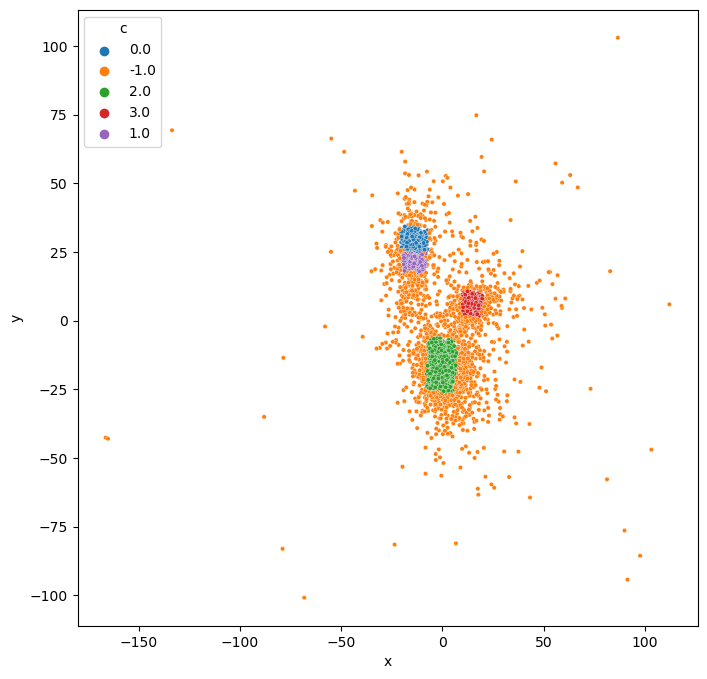

In [34]:
fig, axes = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=cd_out_hit_df, x='x', y='y', hue='c', s=10)
# Pick sequence and check its assignments

plt.show()

#### Track Sequences and Hits across CLANS Maps

In [36]:
tmp_df[(tmp_df['C0'] > 0) & (tmp_df['C2'] > 0)][['id'] + cluster_cols]


,id,C0,C1,C2,C3,C-1
432,DAS78254.1,1,0,2,0,4
1192,DAX93010.1,3,0,4,0,10


In [ ]:
tmp_df[(tmp_df['C0'] > 0) & (tmp_df['C1'] > 0)][['id'] + cluster_cols]


,id,C0,C1,C2,C-1


In [ ]:
tmp_df[(tmp_df['C1'] > 0) & (tmp_df['C2'] > 0)][['id'] + cluster_cols]


,id,C0,C1,C2,C-1


In [ ]:
tmp_df[['id'] + cluster_cols].head(50)

,id,C0,C1,C2,C-1
0,WP_204698829.1,6,0,0,0
1,HIZ80720.1,0,2,0,0
2,WP_183225454.1,0,8,0,0
3,WP_228359148.1,0,9,0,0
4,WP_216483072.1,3,0,0,0
5,PED41969.1,10,0,0,0
6,WP_191706923.1,0,2,0,0
7,QGJ92700.1,17,0,0,0
8,ORB21314.1,0,0,1,0
9,YP_009818849.1,2,0,0,0


In [ ]:
test_seq = 'MBQ7292581.1'
tmp_df[tmp_df['id'] == test_seq]['10R_0MM_n']

337    19
Name: 10R_0MM_n, dtype: int64

In [ ]:
full_hit_df[full_hit_df['id'] == test_seq]

,id,stretch_x,seq_x,header,rep_id
1918,MBQ7292581.1,0,0,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_0,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_0
1919,MBQ7292581.1,0,1,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_1,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_0
1920,MBQ7292581.1,0,2,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_2,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_0
1921,MBQ7292581.1,0,3,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_3,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_0
1922,MBQ7292581.1,0,4,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_4,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_4
1923,MBQ7292581.1,0,5,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_5,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_4
1924,MBQ7292581.1,0,6,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_6,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_4
1925,MBQ7292581.1,0,7,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_7,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_4
1926,MBQ7292581.1,0,8,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_8,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_8
1927,MBQ7292581.1,0,9,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_9,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_8


In [ ]:
cd_out_hit_df[cd_out_hit_df['id'] == test_seq]

,id,stretch_x,seq_x,rep_id,c,x,y
649,MBQ7292581.1,0,0,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_0,0.0,12.212541,-14.402393
650,MBQ7292581.1,0,4,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_4,0.0,11.645080,-14.059154
651,MBQ7292581.1,0,8,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_8,0.0,11.115235,-11.369291
652,MBQ7292581.1,0,11,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_11,0.0,11.158061,-10.808867
653,MBQ7292581.1,0,14,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_14,0.0,10.611016,-10.330281
654,MBQ7292581.1,0,17,MBQ7292581.1_10R_0MM_seq_stretch_0_seq_17,0.0,10.792307,-10.222094


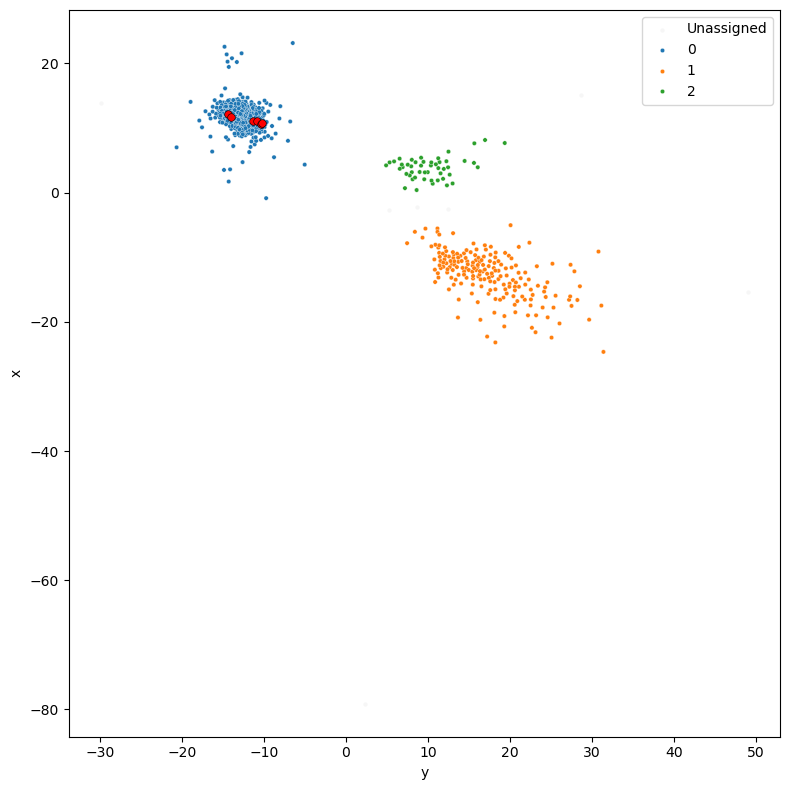

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
cd_out_hit_df['c'] = cd_out_hit_df['c'].astype(float).astype(int).astype(str)
sns.scatterplot(data=cd_out_hit_df[cd_out_hit_df['c'] == '-1'], x='y', y='x', s=10, c='darkgrey', ax=ax, label='Unassigned', alpha=0.1)
sns.scatterplot(data=cd_out_hit_df[cd_out_hit_df['c'] != '-1'], x='y', y='x', s=10, hue='c', ax=ax, palette='tab10', legend='full')
sns.scatterplot(data=cd_out_hit_df[(cd_out_hit_df['id'] == test_seq)], x='y', y='x', s=30, c='red', ax=ax, edgecolor='black')

# plt.text(-400, 390, test_seq, fontsize=12)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
full_tmp_df[full_tmp_df['id'] == test_seq]

,id,seq,stretch_ix,stretch_seq,c,npf_x,npf_y,1R_0MM_seq,1R_0MM_ix,1R_0MM_n,...,3R_2MM_ix,3R_2MM_n,5R_2MM_seq,5R_2MM_ix,5R_2MM_n,10R_2MM_seq,10R_2MM_ix,10R_2MM_n,tmp_only_x,tmp_only_y
4698,MBQ7292581.1,madfglkiglegekefknalaeinqsfkvlgsemklvesefdkndk...,"[[501, 502, 503, 504, 505, 506, 507, 508, 509,...",['knalgtillpvltelasdgvgllgeftngikdaqgdlgkmgevi...,0.0,-148.00838,-88.82699,"[['lgtillpvlte', 'llpvltelasd', 'lpvltelasdg',...","[[[3, 14], [7, 18], [8, 19], [29, 40], [36, 47...",166,...,"[[[7, 40], [29, 62], [36, 69], [39, 72], [40, ...",276,[['lgkmgevigdiipkvidvfmehlpvlldlivtmvtslgqaivd...,"[[[36, 91], [47, 102], [51, 106], [55, 110], [...",187,[['lgkmgevigdiipkvidvfmehlpvlldlivtmvtslgqaivd...,"[[[36, 146], [47, 157], [51, 161], [58, 168], ...",99,-40.150406,-101.779755


#### Majority Vote

In [ ]:
# merge cluster cols into full tmp df for id
dff = full_tmp_df[full_tmp_df['3R_0MM_n'] > 0].merge(tmp_df[['id'] + cluster_cols], on='id', how='left')

In [ ]:
# make a new column for dff which contains the cluster col with the highest value
dff['max_cluster'] = dff[cluster_cols].idxmax(axis=1)


<Axes: xlabel='tmp_only_x', ylabel='tmp_only_y'>

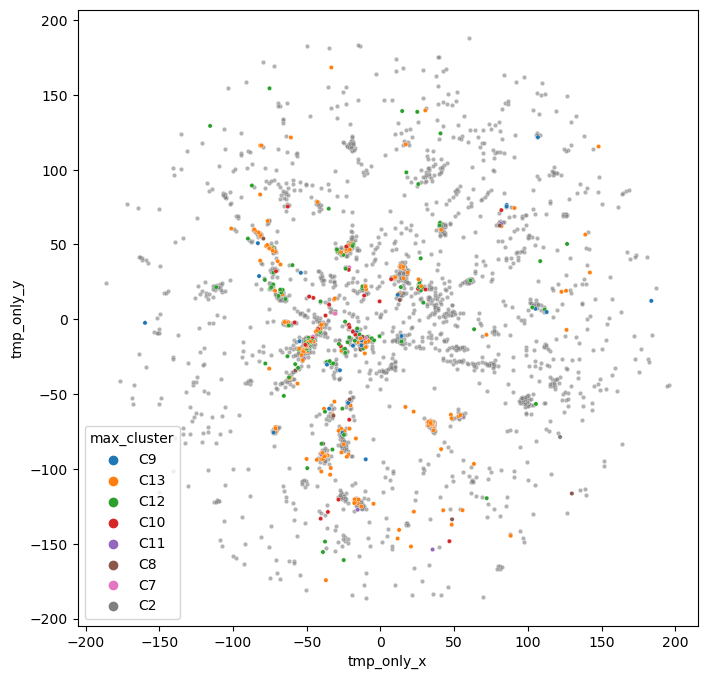

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=dff[dff['max_cluster'] == 'C-1'], x='tmp_only_x', y='tmp_only_y', s=10, color='grey', ax=ax, alpha=0.6)
sns.scatterplot(data=dff[dff['max_cluster'] != 'C-1'], x='tmp_only_x', y='tmp_only_y', s=10, hue='max_cluster', ax=ax, palette='tab10', legend='full')


In [ ]:
dff.max_cluster.value_counts()

max_cluster
C-1    2700
C13     231
C12     121
C10      36
C9       31
C8       13
C11      11
C7        4
C2        1
Name: count, dtype: int64

https://docs.google.com/presentation/d/1MoAZhehSpU2VfHdweUZDfcGXLoVuL3H6aBYE3K3_aGU/edit#slide=id.g2dfdca51de3_0_6